# EDA & Preparing the dataset for hippocampus segmentation

In this notebook I will prepare the hippocampus dataset using Python, and will do an exploratory data analysis of the dataset.

## Import libraries

In [1]:
# Import the following libraries that we will use: nibabel, matplotlib, numpy
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import nibabel as nib
import scipy.ndimage as nd

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI). Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

In [2]:
# Data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
data_path = '/data/TrainingSet/'
image = nib.load(data_path + 'images/hippocampus_042.nii.gz')
label = nib.load(data_path + 'labels/hippocampus_042.nii.gz')

In [3]:
# Check for outliers/bad data by checking volume dimensions of all images
images_path = '/data/TrainingSet/images/'
labels_path = '/data/TrainingSet/labels/'

def show_volume_dimensions(directory):
    print("Directory: " + directory)
    # Get directory object
    directory_object = os.fsencode(directory)
    # For each file in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # Load nifti file volume
        volume = nib.load(directory + filename)
        # Print filename and volume dimensions
        print(filename)
        print(volume.shape)

# Print dimensions of all image volumes
show_volume_dimensions(images_path)

Directory: /data/TrainingSet/images/
hippocampus_376.nii.gz
(35, 55, 37)
hippocampus_165.nii.gz
(34, 49, 29)
hippocampus_286.nii.gz
(37, 45, 46)
hippocampus_152.nii.gz
(36, 53, 37)
hippocampus_176.nii.gz
(35, 50, 36)
hippocampus_096.nii.gz
(34, 47, 39)
hippocampus_068.nii.gz
(36, 40, 43)
hippocampus_289.nii.gz
(35, 49, 36)
hippocampus_260.nii.gz
(35, 53, 29)
hippocampus_171.nii.gz
(35, 56, 28)
hippocampus_296.nii.gz
(35, 54, 35)
hippocampus_142.nii.gz
(38, 43, 41)
hippocampus_375.nii.gz
(32, 54, 34)
hippocampus_097.nii.gz
(37, 48, 34)
hippocampus_064.nii.gz
(35, 53, 35)
hippocampus_108.nii.gz
(36, 53, 37)
hippocampus_070.nii.gz
(37, 50, 38)
hippocampus_329.nii.gz
(34, 53, 32)
hippocampus_107.nii.gz
(35, 55, 34)
hippocampus_090.nii.gz
(37, 50, 40)
hippocampus_092.nii.gz
(38, 49, 28)
hippocampus_318.nii.gz
(37, 51, 33)
hippocampus_333.nii.gz
(33, 46, 38)
hippocampus_123.nii.gz
(32, 53, 38)
hippocampus_037.nii.gz
(34, 51, 32)
hippocampus_023.nii.gz
(35, 51, 35)
hippocampus_330.nii.gz
(35,

hippocampus_223.nii.gz
(35, 52, 37)
hippocampus_328.nii.gz
(38, 54, 30)
hippocampus_038.nii.gz
(37, 51, 35)
hippocampus_180.nii.gz
(37, 45, 36)
hippocampus_220.nii.gz
(39, 45, 40)
hippocampus_383.nii.gz
(33, 55, 29)
hippocampus_244.nii.gz
(38, 53, 30)
hippocampus_277.nii.gz
(33, 59, 29)
hippocampus_083.nii.gz
(33, 52, 37)
hippocampus_010.nii.gz
(512, 512, 241)
hippocampus_042.nii.gz
(37, 52, 34)
hippocampus_349.nii.gz
(34, 50, 34)
hippocampus_300.nii.gz
(34, 53, 35)
hippocampus_164.nii.gz
(41, 48, 47)
hippocampus_303.nii.gz
(35, 48, 38)
hippocampus_326.nii.gz
(36, 49, 41)
hippocampus_124.nii.gz
(35, 55, 41)
hippocampus_268.nii.gz
(34, 51, 37)
hippocampus_222.nii.gz
(34, 49, 36)
hippocampus_053.nii.gz
(37, 51, 35)
hippocampus_172.nii.gz
(34, 56, 31)
hippocampus_156.nii.gz
(36, 52, 36)
hippocampus_136.nii.gz
(34, 49, 41)
hippocampus_177.nii.gz
(33, 44, 40)
hippocampus_181.nii.gz
(33, 49, 40)
hippocampus_354.nii.gz
(36, 50, 32)
hippocampus_359.nii.gz
(35, 49, 35)
hippocampus_141.nii.gz
(3

Ok so there is a bit of variance in the image volume dimensions. However for volume hippocampus_010.nii.gz there is a huge difference in dimensions (512, 512, 241) so this looks like an outlier.

In [4]:
# Print dimensions of all label volumes
show_volume_dimensions(labels_path)

Directory: /data/TrainingSet/labels/
hippocampus_376.nii.gz
(35, 55, 37)
hippocampus_165.nii.gz
(34, 49, 29)
hippocampus_286.nii.gz
(37, 45, 46)
hippocampus_152.nii.gz
(36, 53, 37)
hippocampus_176.nii.gz
(35, 50, 36)
hippocampus_096.nii.gz
(34, 47, 39)
hippocampus_068.nii.gz
(36, 40, 43)
hippocampus_289.nii.gz
(35, 49, 36)
hippocampus_260.nii.gz
(35, 53, 29)
hippocampus_171.nii.gz
(35, 56, 28)
hippocampus_296.nii.gz
(35, 54, 35)
hippocampus_142.nii.gz
(38, 43, 41)
hippocampus_375.nii.gz
(32, 54, 34)
hippocampus_097.nii.gz
(37, 48, 34)
hippocampus_064.nii.gz
(35, 53, 35)
hippocampus_108.nii.gz
(36, 53, 37)
hippocampus_070.nii.gz
(37, 50, 38)
hippocampus_329.nii.gz
(34, 53, 32)
hippocampus_107.nii.gz
(35, 55, 34)
hippocampus_090.nii.gz
(37, 50, 40)
hippocampus_092.nii.gz
(38, 49, 28)
hippocampus_318.nii.gz
(37, 51, 33)
hippocampus_333.nii.gz
(33, 46, 38)
hippocampus_123.nii.gz
(32, 53, 38)
hippocampus_037.nii.gz
(34, 51, 32)
hippocampus_023.nii.gz
(35, 51, 35)
hippocampus_330.nii.gz
(35,

hippocampus_242.nii.gz
(38, 52, 34)
hippocampus_319.nii.gz
(33, 48, 34)
hippocampus_046.nii.gz
(36, 49, 38)
hippocampus_034.nii.gz
(36, 49, 40)
hippocampus_223.nii.gz
(35, 52, 37)
hippocampus_328.nii.gz
(38, 54, 30)
hippocampus_038.nii.gz
(37, 51, 35)
hippocampus_180.nii.gz
(37, 45, 36)
hippocampus_220.nii.gz
(39, 45, 40)
hippocampus_383.nii.gz
(33, 55, 29)
hippocampus_244.nii.gz
(38, 53, 30)
hippocampus_277.nii.gz
(33, 59, 29)
hippocampus_083.nii.gz
(33, 52, 37)
hippocampus_010.nii.gz
(36, 50, 31)
hippocampus_042.nii.gz
(37, 52, 34)
hippocampus_349.nii.gz
(34, 50, 34)
hippocampus_300.nii.gz
(34, 53, 35)
hippocampus_164.nii.gz
(41, 48, 47)
hippocampus_303.nii.gz
(35, 48, 38)
hippocampus_326.nii.gz
(36, 49, 41)
hippocampus_124.nii.gz
(35, 55, 41)
hippocampus_268.nii.gz
(34, 51, 37)
hippocampus_222.nii.gz
(34, 49, 36)
hippocampus_053.nii.gz
(37, 51, 35)
hippocampus_172.nii.gz
(34, 56, 31)
hippocampus_156.nii.gz
(36, 52, 36)
hippocampus_136.nii.gz
(34, 49, 41)
hippocampus_177.nii.gz
(33, 

Ok so there is a bit of variance in the label volume dimensions. However for volume hippocampus_281.nii.gz there is a huge difference in dimensions (512, 512, 94) so this looks like an outlier.

In [5]:
# Nibabel can present image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. We can verify this
# by accessing the .shape attribute. Check the dimensions of the input arrays

# Visualize a few slices from the dataset, along with their labels. 
# We can adjust plot sizes like so if they are too small:

# Get images data
image_data = image.get_fdata()
label_data = label.get_fdata()

# Print dimensions
print(image_data.shape)
print(label_data.shape)

(37, 52, 34)
(37, 52, 34)


Text(0.5, 0.98, 'Center slices for saggital, coronal and axial planes')

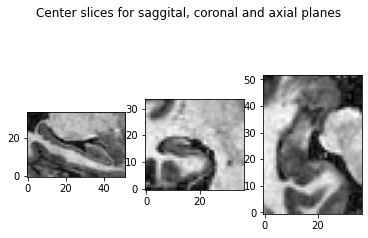

In [6]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

# Take center slice in each plane
# Saggital plane (split eyes) center slice
slice_0 = image_data[18, :, :]
# Coronal plane (face on) center slice
slice_1 = image_data[:, 26, :]
# Axial/Transverse plane (top down) center slice
slice_2 = image_data[:, :, 17]
    
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for saggital, coronal and axial planes")  

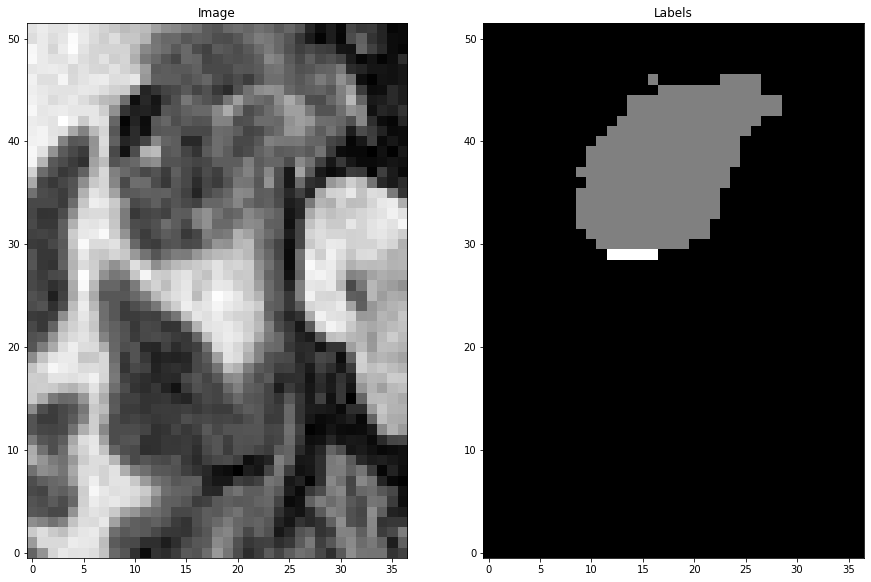

In [7]:
plt.rcParams["figure.figsize"] = (15,15)

def show_image_and_label_slices(slice_index):
    """ Function to display for given value slice index, image and label """
    fig, axes = plt.subplots(1, 2)
    # Plot axial plane slice & label
    slice_image = image_data[:, :, slice_index]
    slice_labels = label_data[:, :, slice_index]
    axes[0].imshow(slice_image.T, cmap="gray", origin="lower")
    axes[0].set_title('Image')
    axes[1].imshow(slice_labels.T, cmap="gray", origin="lower")
    axes[1].set_title('Labels')

# Show slice 10 image and labels
show_image_and_label_slices(10)

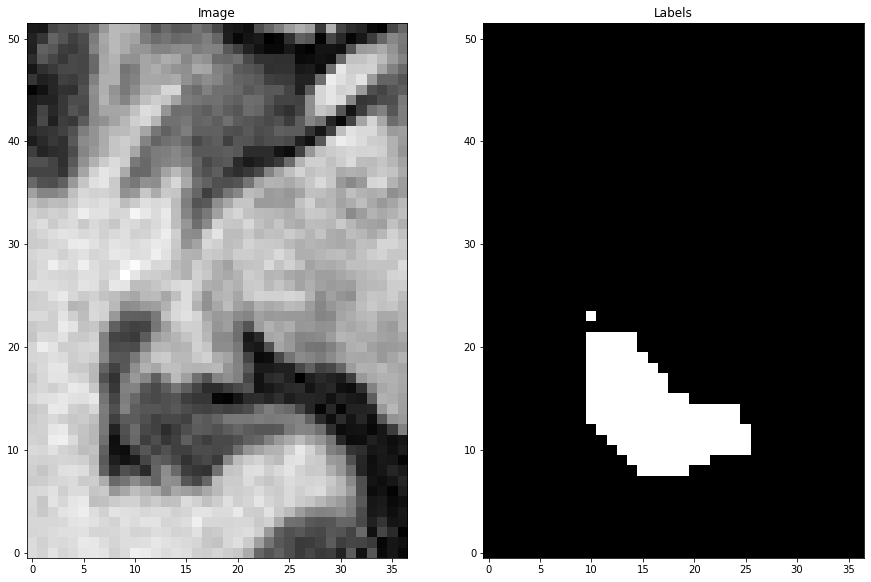

In [8]:
# Show slice 30 image and labels
show_image_and_label_slices(20)

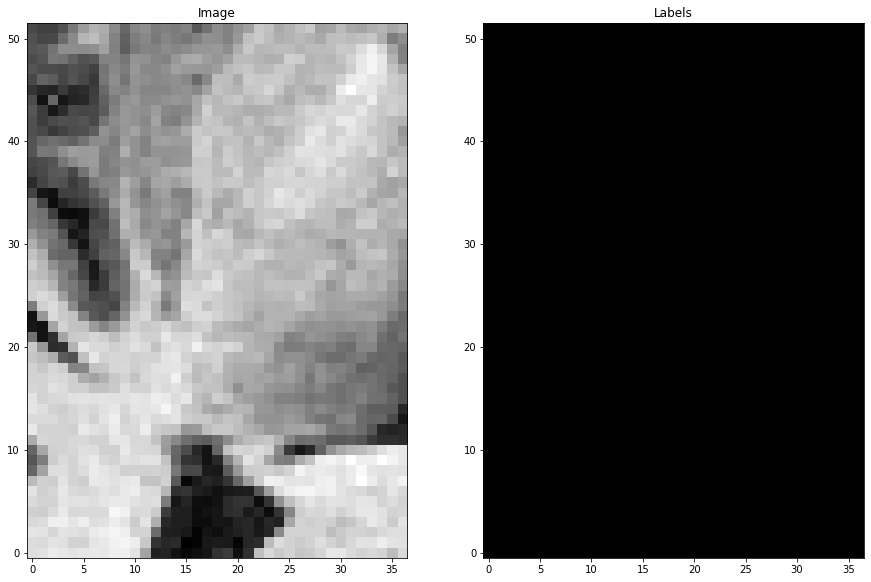

In [9]:
# Show slice 40 image and labels
show_image_and_label_slices(30)

I notice from my label slices there seem 2 shades of labels one grey and one white? do we have 2 labels? i.e. 3 states, no label, label 1 & label 2? lets test that and see what labels we have.

In [38]:
np.unique(label_data)

array([0., 1., 2.])

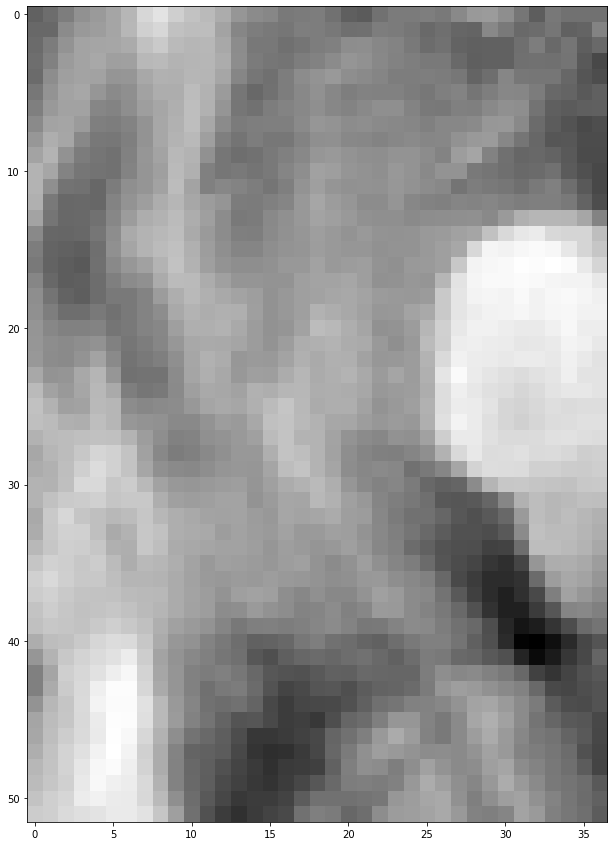

In [11]:
# Orthographic projection on axial plane
vr = np.zeros((image_data.shape[0], image_data.shape[1]))

for z in range (image_data.shape[2]):
    vr += image_data[:,:,z]
    
plt.imshow(nd.rotate(vr, 90), cmap="gray")

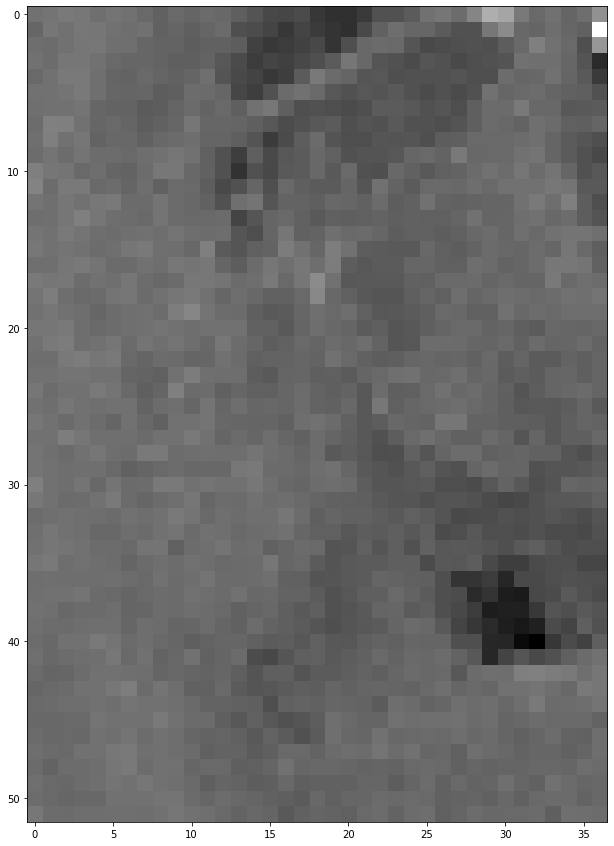

In [12]:
# Maximum intensity projection on axial plane
# For a change, let's stack slices along the Y axis and thus visualize the coronal plane
mip = np.zeros((image_data.shape[0], image_data.shape[1]))

for z in range(image_data.shape[2]):
    mip = np.maximum(mip, image_data[:,:,z])
    
plt.imshow(nd.rotate(mip, 90), cmap="gray")

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [13]:
# Nibabel supports many imaging formats, NIFTI being just one of them. 
# Check the format of our images?
image.header_class

nibabel.nifti1.Nifti1Header

In [14]:
print(image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 37 52 34  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. We can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [15]:
# How many bits per pixel are used?
image.header['bitpix']

array(32, dtype=int16)

In [16]:
# What are the units of measurement?
# Units of pixdim - the dimension of the grid spacing in voxels - are encoded as binary not decimal numbers!
image.header['xyzt_units']

array(10, dtype=uint8)

In [17]:
# Use convenience function to extract units from binary encoded field
image.header.get_xyzt_units()

('mm', 'sec')

In [18]:
# Do we have a regular grid? What are grid spacings?
image.header['pixdim']

array([1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

So pixdim dimensions 1-3 correspond to the grid spacings for the x,y & z dimensions. As these are all equal to 1 - we do have a regular grid.

Text(0.5, 0.98, 'Center slices for saggital, coronal and axial planes')

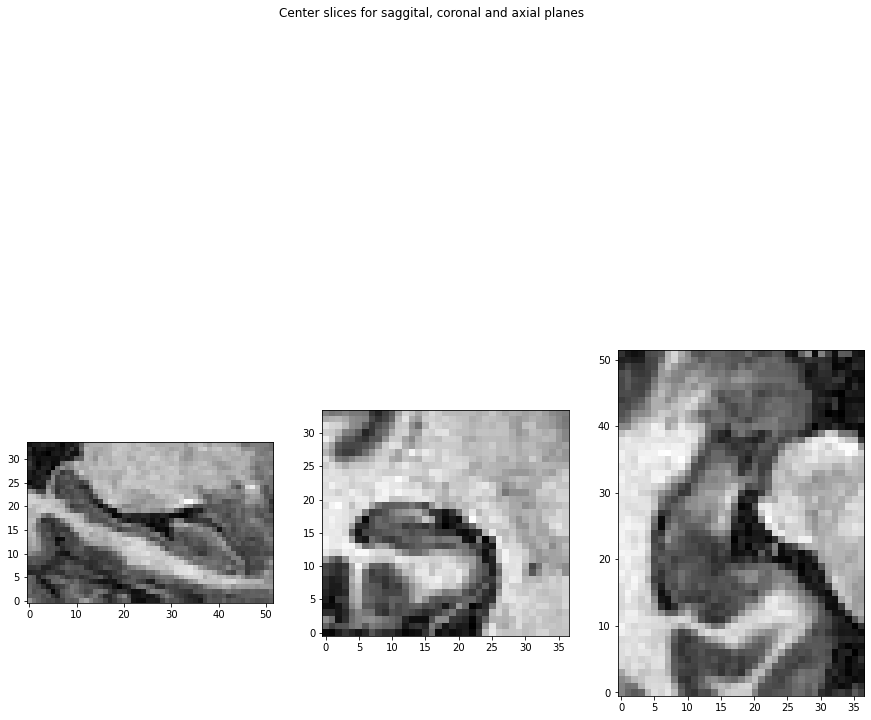

In [19]:
# What dimensions represent axial, sagittal, and coronal slices? How do we know?

# In the documentation here: https://brainder.org/2012/09/23/the-nifti-file-format/
# It says "Predefined dimensions for space and time: In the nifti format, the first three dimensions are reserved 
# to define the three spatial dimensions — x, y and z —"

# Take center slice in each plane
# Saggital plane (split eyes) center slice
slice_0 = image_data[18, :, :]
# Coronal plane (face on) center slice
slice_1 = image_data[:, 26, :]
# Axial/Transverse plane (top down) center slice
slice_2 = image_data[:, :, 17]
    
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for saggital, coronal and axial planes")  

In [33]:
# We should have enough information now to decide what are dimensions of a single voxel
# Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# We should get a number between ~2200 and ~4500

volume = np.sum(label.get_fdata() > 0)
volume

3847

## Plotting some charts

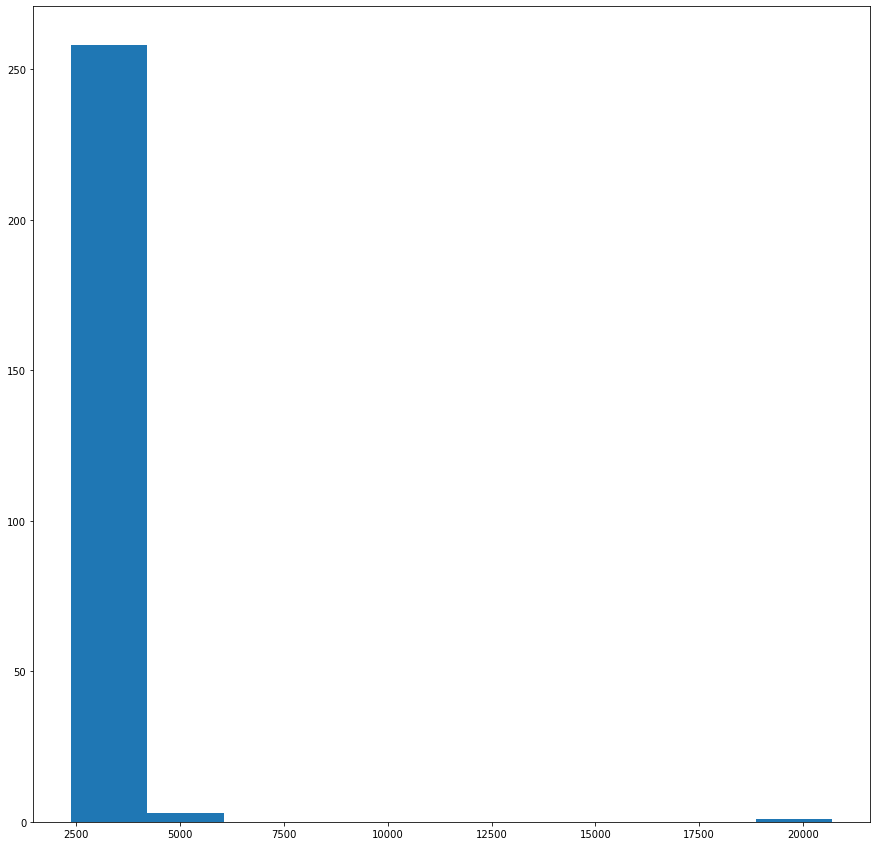

In [34]:
# Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

def plot_label_volumes():
    
    volume_totals = []
    # Get directory object for labels
    directory_object = os.fsencode(labels_path)
    # For each label in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # Load nifti file for label
        label = nib.load(labels_path + filename)
        # Calculate label volume
        label_volume = np.sum(label.get_fdata() > 0)
        # Append volume
        volume_totals.append(label_volume)
        
    plt.hist(volume_totals)
        
plot_label_volumes()

We can observe an outlier with a much bigger volume of 20,000. We identified potential outliers earlier in our process. We can remove these so we can focus on the bulk of the distribution.

Outlier detected with volume of 20702 in file hippocampus_281.nii.gz
Outlier excluded from plot


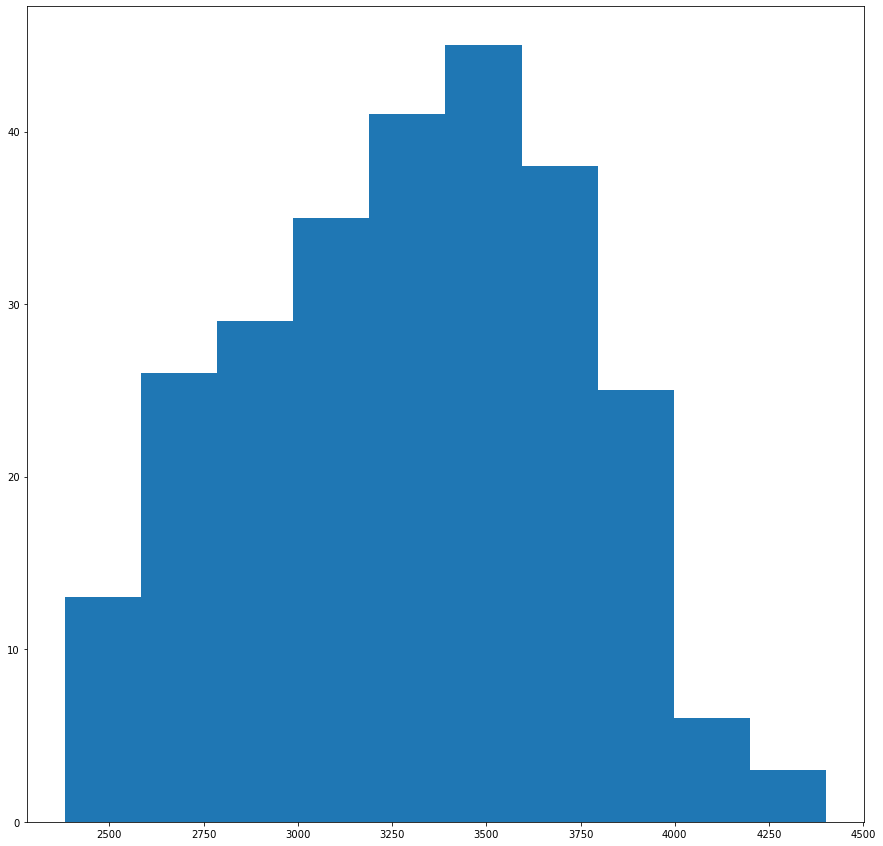

In [37]:
def plot_label_volumes2():
    
    volume_totals = []
    # Get directory object for labels
    directory_object = os.fsencode(labels_path)
    # For each label in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # Load nifti file for label
        label = nib.load(labels_path + filename)
        # Calculate label volume
        label_volume = np.sum(label.get_fdata() > 0)
        # If we detect an outlier
        if (label_volume > 7500):
            # Print message
            print("Outlier detected with volume of " + str(label_volume) + " in file " + filename)
            print("Outlier excluded from plot")
        else:
            # Append volume
            volume_totals.append(label_volume)
        
    plt.hist(volume_totals)
        
plot_label_volumes2()

<img src="img/nomogram_fem_right.svg" width=400 align=left>

**I observed an outlier at around 20,000 which we removed to re-plot the histogram more clearly. With outliers removed, my distribution of values for the right-hippocampus is similar to that in the chart of the normal population.**

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is.

The mask seems to have two classes, labeled with values `1` and `2` respectively. When we visualized sagittal or axial views, we got a guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [46]:
# Copy the clean dataset to the output folder inside section1/out. We will use it in the next Section
# Note 118 included as has image but no corresponding label
outliers = ['hippocampus_010.nii.gz', 'hippocampus_281.nii.gz', 'hippocampus_118.nii.gz']

def copy_clean_dataset():
    
    # Make new dir for clean dataset
    if not os.path.exists('out/TrainingSet/'):
        os.mkdir('out/TrainingSet/')
    
    # LABELS
    # Make directory for clean labels dir
    clean_labels_path = 'out/TrainingSet/labels/'
    if not os.path.exists(clean_labels_path):
        os.mkdir(clean_labels_path)
    # Get directory object for old label dir
    directory_object = os.fsencode(labels_path)
    # For each label in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # If not an outlier
        if filename not in outliers:
            # Copy file to clean dir
            os.popen('cp ' + labels_path + filename + ' ' + clean_labels_path + filename) 
            
    # IMAGES
    # Make directory for clean images dir
    clean_images_path = 'out/TrainingSet/images/'
    if not os.path.exists(clean_images_path):
        os.mkdir(clean_images_path)
    # Get directory object for old images dir
    directory_object = os.fsencode(images_path)
    # For each label in directory
    for file in os.listdir(directory_object):
        # Get filename
        filename = os.fsdecode(file)
        # If not an outlier
        if filename not in outliers:
            # Copy file to clean dir
            os.popen('cp ' + images_path + filename + ' ' + clean_images_path + filename) 
        
copy_clean_dataset()

## Conclusion

In this section we have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have also inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section we will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will give us all we need to use the model in the clinical context and reason about its performance.